# Analyse des données d'expérience

Expérience: J7 Energie Solaire, expérience 1

Date: 2023-10-01

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tikzplotlib

In [3]:
rawdata = np.loadtxt("../data/Pgamma(d).csv", dtype=float, delimiter=",", skiprows=1, max_rows=26)
d2inverse = 1/rawdata[:,0]**2
len(rawdata)

26

In [5]:
# Pgamma
PgammaS = rawdata[:,1]
Pgamma = PgammaS * 0.01

In [7]:
delta_PgammaS = np.maximum.reduce((np.ones(len(PgammaS)) * 10, PgammaS * 0.05))
delta_PgammaS

array([10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   , 10.   ,
       10.   , 10.045])

In [8]:
coefs = np.polyfit(d2inverse[:21], rawdata[:,1][:21], 1)
fit = np.poly1d(coefs)
coefs

array([2.21705587e+05, 1.70676301e+01])

Text(0.5, 0.98, 'Fit linéaire de P$_\\gamma$ en fonction de 1/d²')

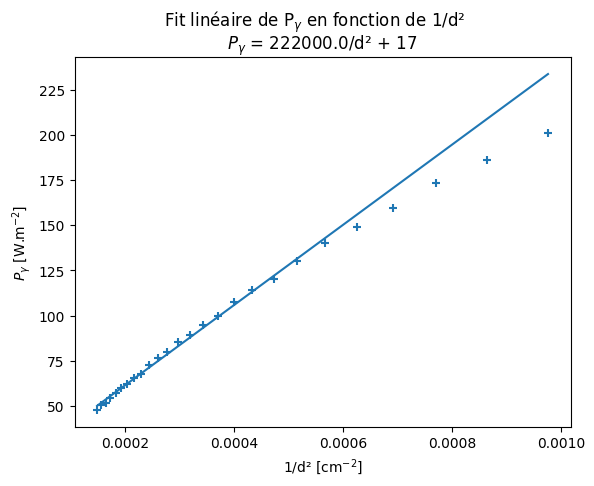

In [22]:
plt.scatter(d2inverse, Pgamma, marker="+")
plt.plot(d2inverse, fit(d2inverse))
plt.xlabel("1/d² [cm$^{-2}$]")
plt.ylabel("$P_\gamma$ [W.m$^{-2}$]")
plt.title(f"$P_\gamma$ = {round(coefs[0], -3)}/d² + {round(coefs[1])}")
#TODO: signifcant figures
plt.suptitle("Fit linéaire de P$_\gamma$ en fonction de 1/d²")

In [18]:
print(f"On obtient un fit donnant P$_\gamma$ = {coefs[0]}/d² + {coefs[1]}")

On obtient un fit donnant P$_\gamma$ = 191869.1903128819/d² + 25.26115692328881
